# HW 4

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

# Question 1: Exploratory Data Analysis

In [3]:
import zipfile

zf = zipfile.ZipFile('C:/Users/Adam/Documents/MFE/(5) Summer Prep/(7) Python/compustat.zip') 
data = pd.read_csv(zf.open('compustat.csv'))

In [4]:
data.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


### 1. Variable names that we are interested in:
sic code: four digits integer for company<br>
datecqtr: year/ quarter time for the record<br>
cusip: compustats identifier for a company<br>
chod: shares out of standing (in million)<br>
saleq: sales of current quarter (in million)<br>
prccq: close price of current quarter (in dollar)

In [5]:
cols = pd.Index(['sic','datacqtr','cusip','cshoq','saleq','prccq'],name='variable')

In [6]:
data = data.reindex(columns=cols)

In [7]:
data.head()

variable,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


In [8]:
# add market cap
data['mktcap'] = data['cshoq']*data['prccq']

In [9]:
data.tail() # with mktcap added

variable,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap
1811294,NaN,2019Q1,G4511M108,NaN,4.560,NaN,NaN
1811295,NaN,2019Q2,G4511M108,20.162,12.713,2.7500,55.445500
1811296,NaN,2019Q3,G4511M108,22.518,11.750,1.1500,25.895700
1811297,NaN,2019Q4,G4511M108,25.662,12.790,1.0173,26.105953
1811298,NaN,2020Q1,G4511M108,31.330,10.873,0.6400,20.051200


### 2. For saleq and market cap, compute the following:
Time series mean <br>
Time Series standard deviation<br>
Time Series count of missing values<br>
Time Series ratio of missing values<br>
Aggregate the result in a dataframe<br>

In [10]:
def get_stats(x):
    null_ct = x.isnull().sum() # used 3 times, just call it once
    return pd.Series([x.max(),x.min(),x.mean(),x.std(),null_ct,null_ct/(x.count()+null_ct)],index=['max','min','mean','stdev','null_ct','null_ratio']) # added max and min

In [11]:
formatter = lambda x: '%.2f' % x

In [12]:
data_stats = pd.DataFrame(data,columns=['saleq','mktcap']).apply(get_stats)
data_stats.applymap(formatter)

,saleq,mktcap
max,207307.33,1540774.21
min,-25623.00,0.00
mean,445.15,2057.47
stdev,2679.71,13202.20
null_ct,269498.00,468276.00
null_ratio,0.15,0.26


### 3. Answer the following questions:
Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?<br>
Implement some schemes to detect outliers.<br>
Do you find some outliers? Could you think why? You can do some research using google.<br>
What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.<br>

#### Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
1) Examine the stats - i.e. saleq has a max that is ~74 standard deviations from the mean - there is a high potential for this to be an outlier<br>
2) Look at a boxplot of the data to determine outliers<br>

In [13]:
import matplotlib.pyplot as plt

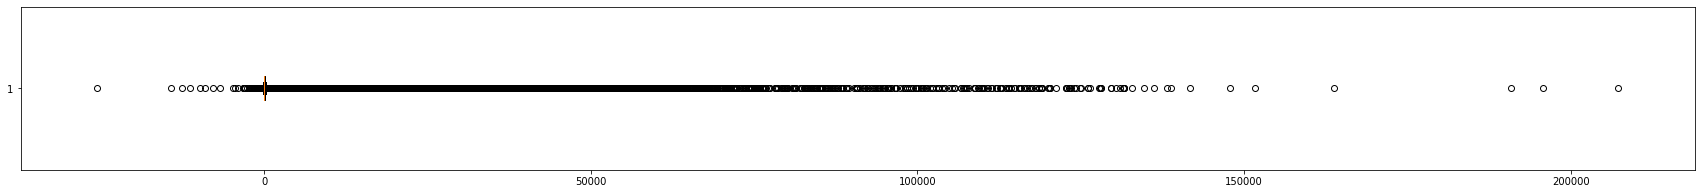

In [14]:
# Implement some schemes to detect outliers.
# for simplicity we will only look at saleq
# boxplot
fig = plt.figure(figsize =(30,3)) 
axes = fig.add_subplot(111) 
bp = axes.boxplot(data.dropna(subset=['saleq'])['saleq'],vert=False)

##### Do you find some outliers? Could you think why? You can do some research using google.
we can see from this box plot that there are a tremendous number of values outside of the inter-quartile range<br>
although there are a ton of values outside of the IQR, their numbers don't indicate a single or even group of outliers but simply data with extremely long tails<br>
for saleq specifically, this distribution makes sense. this data is taken from a number of different CUSIPs so we have both small and large cap companies driving the tails,<br>
without even considering economic events that could drive outliers for a given CUSIP<br>

In [15]:
data_stats.applymap(formatter)

,saleq,mktcap
max,207307.33,1540774.21
min,-25623.00,0.00
mean,445.15,2057.47
stdev,2679.71,13202.20
null_ct,269498.00,468276.00
null_ratio,0.15,0.26


#### What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.
Analyzing the above table, we can see that the data will have an extremely long right tail. This was confirmed by the boxplot.<br>
From looking at market cap, we can also see that we have a huge spread of company sizes, considering the max is ~77x larger than the mean and stdev is ~7x the mean.
It probably does not make sense to do analysis before parsing the data further - either by mktcap or looking at individual CUSIPs or in some other way.

# Question 2: Compute Industry Concentration

In [16]:
# pull in necessary data from 'data' df, organize
data_HHI = pd.DataFrame(data,columns=['sic','datacqtr','mktcap']) # select only the necessary data
data_HHI = data_HHI.dropna(subset=['sic','datacqtr','mktcap']) # get rid of all NaN entries
data_HHI = data_HHI.groupby(['sic','datacqtr'],as_index=False)['mktcap'].sum() # reduce table by sic/datacqtr unique combos
data_HHI['ind_code'] = data_HHI['sic']//100 # get two digit sic codes

# calculate industry caps, add to data_HHI
ind_cap = data_HHI.groupby(['datacqtr','ind_code'])['mktcap'].sum().reset_index()
ind_cap.rename(columns={'mktcap':'ind_cap'},inplace=True)
data_HHI = pd.merge(data_HHI,ind_cap,on=['datacqtr','ind_code'])

# calc mktshare, HHI by company
data_HHI['mktshare'] = data_HHI['mktcap']/data_HHI['ind_cap']
data_HHI['HHI'] = (data_HHI['mktshare']*100)**2

# calculate industry HHI, add to data_HHI
HHI_ind = data_HHI.groupby(['datacqtr','ind_code'])['HHI'].sum().reset_index()
HHI_ind.rename(columns={'HHI':'HHI_ind'},inplace=True)
data_HHI = pd.merge(data_HHI,HHI_ind,on=['datacqtr','ind_code'])

data_HHI['HHI_ind'].describe()

count    85853.000000
mean      3720.902151
std       2477.010747
min        744.241050
25%       1941.663049
50%       2944.189236
75%       4834.335125
max      10000.000000
Name: HHI_ind, dtype: float64

In [17]:
# calculate average HHI across all quarters
avg_HHI = data_HHI.groupby(['ind_code'])['HHI_ind'].mean().reset_index()
# remove industries with average HHI of 10,000 (indstries with only one company)
avg_HHI = avg_HHI[avg_HHI['HHI_ind']<10000]
avg_HHI.sort_values(ascending=False,by='HHI_ind',inplace=True,ignore_index=True)
avg_HHI.head()

,ind_code,HHI_ind
0,58.0,9934.800747
1,40.0,9923.524283
2,70.0,9902.525227
3,29.0,9660.884951
4,21.0,8977.683518


In [18]:
# get top 4 industries by average HHI
concentrated_inds = [avg_HHI['ind_code'][index] for index in range(4)]
concentrated_inds

[58.0, 40.0, 70.0, 29.0]

In [33]:
# data_HHI for only top four industries, only necessary data: datacqtr, ind_code, HHI_ind
top_HHI = pd.DataFrame(data_HHI,columns=['datacqtr','ind_code','HHI_ind'])
top_HHI = top_HHI[top_HHI['ind_code'].isin(concentrated_inds)]

# get rid of duplicates: there will be as many duplicates as companies in an industry
top_HHI.drop_duplicates(inplace=True)

# reset index
top_HHI.reset_index(drop=True,inplace=True)

# change datacqtr to date format (to be used later for plotting)
top_HHI['datacqtr'] = pd.to_datetime(top_HHI['datacqtr'].str[:4] + top_HHI['datacqtr'].str[4:6])

top_HHI

,datacqtr,ind_code,HHI_ind
0,1966-01-01,29.0,10000.000000
1,1966-04-01,29.0,10000.000000
2,1966-07-01,29.0,10000.000000
3,1966-10-01,29.0,10000.000000
4,1967-01-01,29.0,5426.014686
...,...,...,...
878,2019-01-01,70.0,10000.000000
879,2019-04-01,70.0,10000.000000
880,2019-07-01,70.0,10000.000000
881,2019-10-01,70.0,10000.000000


In [34]:
# pivot data for time series plotting
ts_data = top_HHI.pivot(index='datacqtr', columns='ind_code', values='HHI_ind')

# only use timeframe in which all four industries existed
ts_data.dropna(inplace=True)

ts_data

ind_code,29.0,40.0,58.0,70.0
datacqtr,,,,
1967-10-01,5012.337056,9586.473875,10000.000000,10000.0
1968-01-01,6542.375959,10000.000000,10000.000000,10000.0
1968-04-01,5441.119064,10000.000000,10000.000000,10000.0
1968-10-01,6671.482327,9799.633620,10000.000000,10000.0
1969-04-01,7026.116164,9285.417305,10000.000000,10000.0
...,...,...,...,...
2019-01-01,9857.598674,10000.000000,9819.565617,10000.0
2019-04-01,9846.427122,10000.000000,9930.307862,10000.0
2019-07-01,9825.724584,10000.000000,9853.862059,10000.0


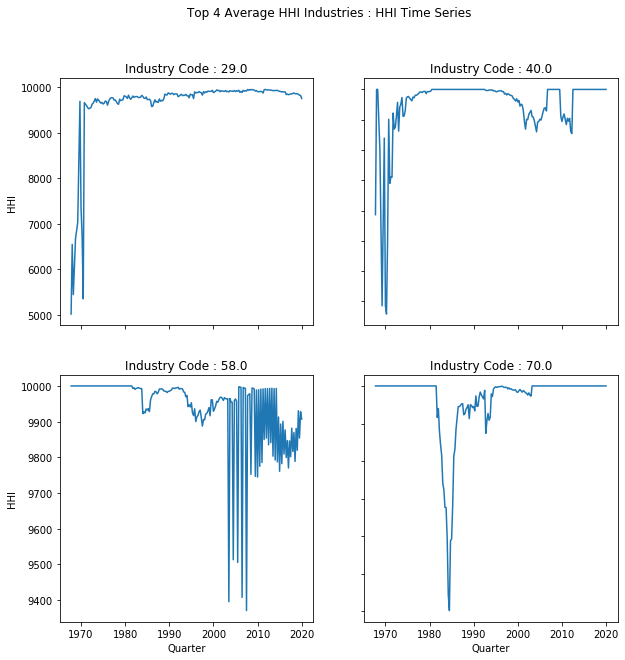

In [35]:
# plot time series of top 4 industries in 2x2 figure
# fig = plt.figure(figsize =(10,10)) 
fig = plt.figure(figsize=(10,10)) 
axes = fig.subplots(2,2)

fig.suptitle('Top 4 Average HHI Industries : HHI Time Series')
axes[0, 0].plot(ts_data.index, ts_data.iloc[:,0])
axes[0, 0].set_title(label='Industry Code : '+str(ts_data.columns[0]))
axes[0, 1].plot(ts_data.index, ts_data.iloc[:,1])
axes[0, 1].set_title(label='Industry Code : '+str(ts_data.columns[1]))
axes[1, 0].plot(ts_data.index, ts_data.iloc[:,2])
axes[1, 0].set_title(label='Industry Code : '+str(ts_data.columns[2]))
axes[1, 1].plot(ts_data.index, ts_data.iloc[:,3])
axes[1, 1].set_title(label='Industry Code : '+str(ts_data.columns[3]))

for ax in axes.flat:
    ax.set(xlabel='Quarter', ylabel='HHI')

# hide outer labels
for ax in axes.flat:
    ax.label_outer()

These industries were not selected very rigorously.<br>
A more thorough approach would have been to not use any industries where HHI reached 10,000<br>
at any point throughout the time series to get a view of more consistent and realistic industries<br>